<a href="https://colab.research.google.com/github/charlie-perez-35/DS4002-Group5-Project3/blob/main/Emotional_Classification_Keras_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

!pip install livelossplot
!pip install tensorflow
!pip install keras

import PIL
import PIL.Image
import tensorflow as tf

import cv2
from random import choice
from glob import glob
from pathlib import Path

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from livelossplot import PlotLossesKerasTF

In [3]:
! git clone https://github.com/spenceryee/CS229

Cloning into 'CS229'...
remote: Enumerating objects: 25127, done.
remote: Total 25127 (delta 0), reused 0 (delta 0), pack-reused 25127
Receiving objects: 100% (25127/25127), 1.62 GiB | 38.56 MiB/s, done.
Resolving deltas: 100% (577/577), done.
Updating files: 100% (2077/2077), done.


In [4]:
folder_paths = ['/content/CS229/CK+/anger', '/content/CS229/CK+/contempt', '/content/CS229/CK+/disgust',
                '/content/CS229/CK+/fear', '/content/CS229/CK+/happiness', '/content/CS229/CK+/sadness',
                '/content/CS229/CK+/surprise']
# ChatGPT
file_list = []
for folder_path in folder_paths:
    files = os.listdir(folder_path)
    files = [os.path.join(folder_path, f) for f in files]
    file_list.extend(files)

In [5]:
combined_dir = '/content/combined_CK_data'
os.makedirs(combined_dir, exist_ok=True)

In [6]:
# Iterate through the folders in the data directory
for folder_name in os.listdir(combined_dir):
    folder_path = os.path.join(combined_dir, folder_name)
    if os.path.isdir(folder_path):
        # Count the number of files in the folder
        num_files = len(os.listdir(folder_path))
        print(f'there are {num_files} images displaying "{folder_name}",')

In [7]:
import shutil

for file_path in file_list:
    folder_name = os.path.basename(os.path.dirname(file_path))
    file_name = os.path.basename(file_path)
    new_folder_path = os.path.join(combined_dir, folder_name)  # New folder path in combined directory
    os.makedirs(new_folder_path, exist_ok=True)  # Create the folder if it doesn't exist
    new_file_path = os.path.join(new_folder_path, file_name)  # New file path with folder structure
    shutil.copy(file_path, new_file_path)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Define parameters for image loading
batch_size = 128
image_size = (256, 256)  # Set the desired size for your images

# Create an instance of ImageDataGenerator for loading images
data_generator = ImageDataGenerator(rescale=1./255)  # Normalize pixel values to [0,1]

# Load images from the directory
data_dir = '/content/combined_CK_data'

In [ ]:
# import os
# import cv2
# import numpy as np

# def save_image_as_png(numpy_array, output_dir, filename):
#     """
#     Save a NumPy array representing an image to a directory as a PNG file.

#     Parameters:
#         numpy_array (numpy.ndarray): The NumPy array representing the image to be saved.
#         output_dir (str): Path to the directory where the image will be saved.
#         filename (str): Name of the file to save the image to.

#     Returns:
#         None
#     """
#     # Create the output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)

#     # Construct the file path
#     filepath = os.path.join(output_dir, filename)

#     # Save the image using OpenCV with PNG format
#     cv2.imwrite(filepath, numpy_array, [cv2.IMWRITE_PNG_COMPRESSION, 0])  # Use PNG compression level 0 for lossless

#     writeStatus = cv2.imwrite(filepath, numpy_array, [cv2.IMWRITE_PNG_COMPRESSION, 0])
#     if writeStatus is True:
#         print("image written")
#     else:
#         print("problem") # or raise exception, handle problem, etc.

# # Example usage
# # Assuming you have a NumPy array called "image_array" representing an image
# # and you want to save it to the directory "output" with the filename "my_image.png"
# # image_array = np.random.randint(0, 255, size=(100, 100, 3), dtype=np.uint8)  # Example random image
# # output_dir = "output"
# # filename = "my_image.png"
# # save_image_as_png(image_array, output_dir, filename)

In [9]:
# !pip install -Uqq ipdb
# import ipdb

In [ ]:
# %pdb off

In [11]:
# Define augmentation parameters
data_generator = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

In [12]:
#augmentation for anger
counter=0
path_list = os.listdir("/content/combined_CK_data/anger/")
for x in path_list:
    target = fr"/content/combined_CK_data/anger/{x}"
    image = load_img(target, color_mode='grayscale')

    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Convert to batch with a single image
    image_array = image_array.astype('uint8')  # Ensure the datatype is uint8

    # Generate augmented versions of the image
    augmented_images = []
    num_augmented_images = 6  # Number of augmented images to generate
    images = np.array(augmented_images)

    #ipdb.set_trace()
    #Generate augmented images and save them to the directory
    for _ in range(num_augmented_images):
        augmented_image_array = data_generator.random_transform(image_array[0])
        path = '/content/combined_CK_data/anger/'
        cv2.imwrite(os.path.join(path , f"{counter}image_{_}.png"), augmented_image_array)
        counter += 1
        augmented_image = array_to_img(augmented_image_array, data_format='channels_last')
        augmented_images.append(augmented_image)

    _ = 0


In [13]:
#augmentation for contempt
counter=0
path_list = os.listdir("/content/combined_CK_data/contempt/")
for x in path_list:
    target = fr"/content/combined_CK_data/contempt/{x}"
    image = load_img(target, color_mode='grayscale')

    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Convert to batch with a single image
    image_array = image_array.astype('uint8')  # Ensure the datatype is uint8

    # Generate augmented versions of the image
    augmented_images = []
    num_augmented_images = 6  # Number of augmented images to generate
    images = np.array(augmented_images)

    #ipdb.set_trace()
    #Generate augmented images and save them to the directory
    for _ in range(num_augmented_images):
        augmented_image_array = data_generator.random_transform(image_array[0])
        path = '/content/combined_CK_data/contempt/'
        cv2.imwrite(os.path.join(path , f"{counter}image_{_}.png"), augmented_image_array)
        counter += 1
        augmented_image = array_to_img(augmented_image_array, data_format='channels_last')
        augmented_images.append(augmented_image)

    _ = 0

In [14]:
#augmentation for disgust
counter=0
path_list = os.listdir("/content/combined_CK_data/disgust/")
for x in path_list:
    target = fr"/content/combined_CK_data/disgust/{x}"
    image = load_img(target, color_mode='grayscale')

    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Convert to batch with a single image
    image_array = image_array.astype('uint8')  # Ensure the datatype is uint8

    # Generate augmented versions of the image
    augmented_images = []
    num_augmented_images = 6  # Number of augmented images to generate
    images = np.array(augmented_images)

    #ipdb.set_trace()
    #Generate augmented images and save them to the directory
    for _ in range(num_augmented_images):
        augmented_image_array = data_generator.random_transform(image_array[0])
        path = '/content/combined_CK_data/disgust/'
        cv2.imwrite(os.path.join(path , f"{counter}image_{_}.png"), augmented_image_array)
        counter += 1
        augmented_image = array_to_img(augmented_image_array, data_format='channels_last')
        augmented_images.append(augmented_image)

    _ = 0

In [15]:
#augmentation for fear
counter=0
path_list = os.listdir("/content/combined_CK_data/fear/")
for x in path_list:
    target = fr"/content/combined_CK_data/fear/{x}"
    image = load_img(target, color_mode='grayscale')

    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Convert to batch with a single image
    image_array = image_array.astype('uint8')  # Ensure the datatype is uint8

    # Generate augmented versions of the image
    augmented_images = []
    num_augmented_images = 6  # Number of augmented images to generate
    images = np.array(augmented_images)

    #ipdb.set_trace()
    #Generate augmented images and save them to the directory
    for _ in range(num_augmented_images):
        augmented_image_array = data_generator.random_transform(image_array[0])
        path = '/content/combined_CK_data/fear/'
        cv2.imwrite(os.path.join(path , f"{counter}image_{_}.png"), augmented_image_array)
        counter += 1
        augmented_image = array_to_img(augmented_image_array, data_format='channels_last')
        augmented_images.append(augmented_image)

    _ = 0

In [16]:
#augmentation for happiness
counter=0
path_list = os.listdir("/content/combined_CK_data/happiness/")
for x in path_list:
    target = fr"/content/combined_CK_data/happiness/{x}"
    image = load_img(target, color_mode='grayscale')

    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Convert to batch with a single image
    image_array = image_array.astype('uint8')  # Ensure the datatype is uint8

    # Generate augmented versions of the image
    augmented_images = []
    num_augmented_images = 6  # Number of augmented images to generate
    images = np.array(augmented_images)

    #ipdb.set_trace()
    #Generate augmented images and save them to the directory
    for _ in range(num_augmented_images):
        augmented_image_array = data_generator.random_transform(image_array[0])
        path = '/content/combined_CK_data/happiness/'
        cv2.imwrite(os.path.join(path , f"{counter}image_{_}.png"), augmented_image_array)
        counter += 1
        augmented_image = array_to_img(augmented_image_array, data_format='channels_last')
        augmented_images.append(augmented_image)

    _ = 0

In [17]:
#augmentation for sadness
counter=0
path_list = os.listdir("/content/combined_CK_data/sadness/")
for x in path_list:
    target = fr"/content/combined_CK_data/sadness/{x}"
    image = load_img(target, color_mode='grayscale')

    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Convert to batch with a single image
    image_array = image_array.astype('uint8')  # Ensure the datatype is uint8

    # Generate augmented versions of the image
    augmented_images = []
    num_augmented_images = 6  # Number of augmented images to generate
    images = np.array(augmented_images)

    #ipdb.set_trace()
    #Generate augmented images and save them to the directory
    for _ in range(num_augmented_images):
        augmented_image_array = data_generator.random_transform(image_array[0])
        path = '/content/combined_CK_data/sadness/'
        cv2.imwrite(os.path.join(path , f"{counter}image_{_}.png"), augmented_image_array)
        counter += 1
        augmented_image = array_to_img(augmented_image_array, data_format='channels_last')
        augmented_images.append(augmented_image)

    _ = 0

In [19]:
#augmentation for surprise
counter=0
path_list = os.listdir("/content/combined_CK_data/surprise/")
for x in path_list:
    target = fr"/content/combined_CK_data/surprise/{x}"
    image = load_img(target, color_mode='grayscale')

    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Convert to batch with a single image
    image_array = image_array.astype('uint8')  # Ensure the datatype is uint8

    # Generate augmented versions of the image
    augmented_images = []
    num_augmented_images = 6  # Number of augmented images to generate
    images = np.array(augmented_images)

    #ipdb.set_trace()
    #Generate augmented images and save them to the directory
    for _ in range(num_augmented_images):
        augmented_image_array = data_generator.random_transform(image_array[0])
        path = '/content/combined_CK_data/surprise/'
        cv2.imwrite(os.path.join(path , f"{counter}image_{_}.png"), augmented_image_array)
        counter += 1
        augmented_image = array_to_img(augmented_image_array, data_format='channels_last')
        augmented_images.append(augmented_image)

    _ = 0

In [20]:
import shutil
def split_folder(source_folder, folder1, folder2, split_ratio=0.5):

    # Create destination folders if they don't exist
    os.makedirs(folder1, exist_ok=True)
    os.makedirs(folder2, exist_ok=True)

    # Get list of files in source folder
    files = os.listdir(source_folder)
    num_files = len(files)

    # Calculate the number of files to move to folder1
    num_files_to_move = int(num_files * split_ratio)

    # Move files to folder1
    for file in files[:num_files_to_move]:
        src = os.path.join(source_folder, file)
        dst = os.path.join(folder1, file)
        shutil.move(src, dst)

    # Move remaining files to folder2
    for file in files[num_files_to_move:]:
        src = os.path.join(source_folder, file)
        dst = os.path.join(folder2, file)
        shutil.move(src, dst)


split_folder("/content/combined_CK_data/anger/", "anger_train", "anger_test", split_ratio=0.8)
split_folder("/content/combined_CK_data/contempt/", "contempt_train", "contempt_test", split_ratio=0.8)
split_folder("/content/combined_CK_data/disgust/", "disgust_train", "disgust_test", split_ratio=0.8)
split_folder("/content/combined_CK_data/fear/", "fear_train", "fear_test", split_ratio=0.8)
split_folder("/content/combined_CK_data/happiness/", "happiness_train", "happiness_test", split_ratio=0.8)
split_folder("/content/combined_CK_data/sadness/", "sadness_train", "sadness_test", split_ratio=0.8)
split_folder("/content/combined_CK_data/surprise/", "surprise_train", "surprise_test", split_ratio=0.8)

In [21]:
def organize_folders(source_folder, text_identifier):

    # Iterate through subfolders in the source folder
    for folder_name in os.listdir(source_folder):
        folder_path = os.path.join(source_folder, folder_name)

        # Check if the subfolder name contains the text identifier
        if text_identifier in folder_name and os.path.isdir(folder_path):
            # Create a destination folder based on the text identifier
            dest_folder = os.path.join(source_folder, text_identifier)
            os.makedirs(dest_folder, exist_ok=True)

            # Move the subfolder to the destination folder
            shutil.move(folder_path, dest_folder)

source_folder = "/content/"
test_folder = "test"
train_folder = "train"
organize_folders(source_folder, test_folder)
organize_folders(source_folder,train_folder)

In [22]:
print("\nTraining dataset\n")
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")
print("\nTest dataset\n")
for expression in os.listdir("test/"):
    print(str(len(os.listdir("test/" + expression))) + " " + expression + " images")


Training dataset

100 contempt_train images
386 happiness_train images
330 disgust_train images
140 fear_train images
252 anger_train images
156 sadness_train images
464 surprise_train images

Test dataset

63 anger_test images
83 disgust_test images
97 happiness_test images
117 surprise_test images
26 contempt_test images
40 sadness_test images
35 fear_test images


In [23]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)

validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1828 images belonging to 7 classes.
Found 461 images belonging to 7 classes.


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_size,img_size,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
#7 nodes in dense for 7 different emotions
model.add(Dense(7, activation='softmax'))

#compile model with accuracy
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 7)                 433671    
                                                                 
Total params: 452775 (1.73 MB)
Trainable params: 452775 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


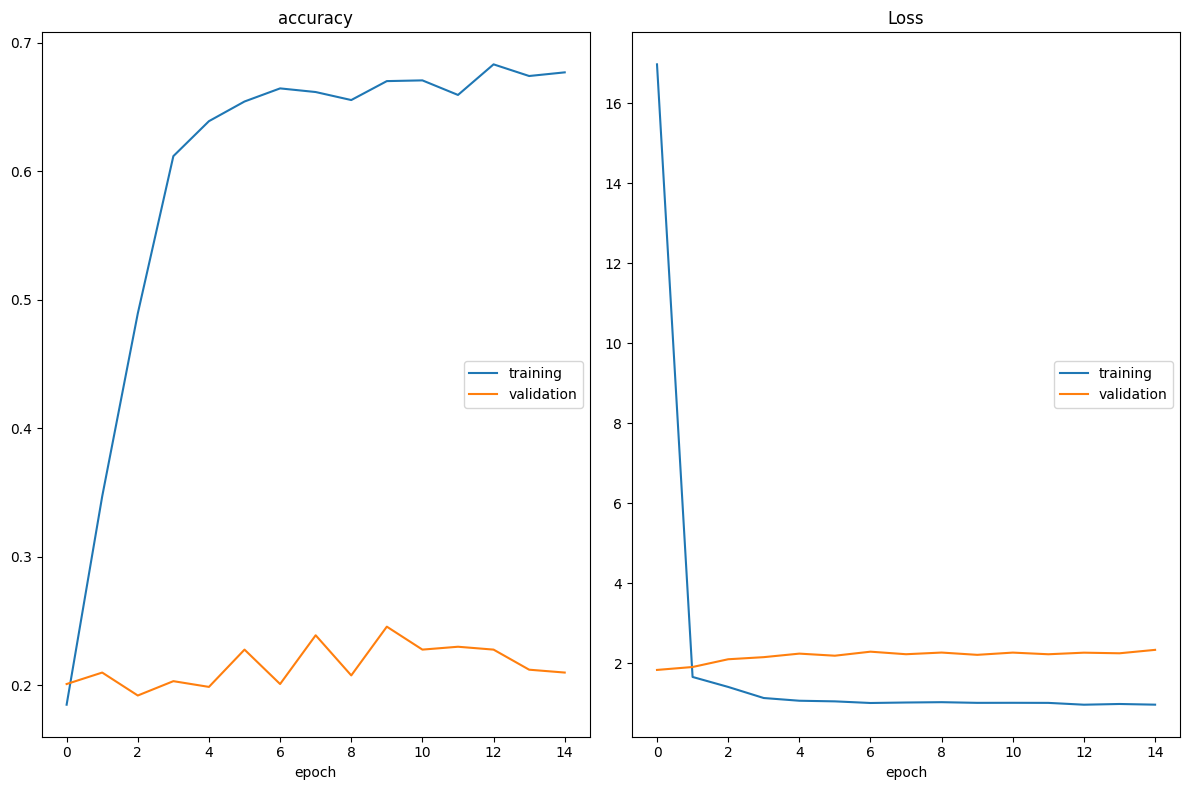

accuracy
	training         	 (min:    0.185, max:    0.683, cur:    0.677)
	validation       	 (min:    0.192, max:    0.246, cur:    0.210)
Loss
	training         	 (min:    0.963, max:   16.976, cur:    0.964)
	validation       	 (min:    1.833, max:    2.335, cur:    2.335)

Epoch 15: saving model to model_weights.h5
28/28 [==============================] - 23s 802ms/step - loss: 0.9644 - accuracy: 0.6769 - val_loss: 2.3348 - val_accuracy: 0.2098 - lr: 1.0000e-05
CPU times: user 8min 39s, sys: 32.8 s, total: 9min 12s
Wall time: 7min 52s


In [25]:
#from https://github.com/katoch99/Emotion-Recognition

%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)